In [20]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


def remove_outliers(column, dataframe, outlier_percent):
    percentile = dataframe[column].quantile(outlier_percent)
    dataframe[column] = dataframe[column].apply(lambda x: None if x > percentile else x)
    return dataframe


data = pd.read_csv("./benchmark.csv")

data.sort_values(by="size", inplace=True)

plot_time_list = ["buildTime", "displayTime", "breadthFirstSearchTime", "preOrderTime",
                  "inlineOrderTime", "posOrderTime", "heightTime"]

scale = "log"

do_remove_outliers = True
outlier_percent = 1
if do_remove_outliers:
    for value in plot_time_list:
        data = remove_outliers(value, data, outlier_percent)

grouped = data.groupby(by=["type"])

vector = grouped.get_group("Vector")
linked = grouped.get_group("Linked")


def print_percentiles_and_mean(series):
    # Calculate the mean of the series
    mean = series.mean()

    # Determine counts in different percentiles
    percentile_25 = series.quantile(0.25)
    percentile_50 = series.quantile(0.5)
    percentile_75 = series.quantile(0.75)
    percentile_100 = series.max()  # Total count (100th percentile)

    # Print the mean and counts in specific percentiles
    mean_str = f"{mean:12.0f}"
    p25_str = f"{int(percentile_25):12d}"
    p50_str = f"{int(percentile_50):12d}"
    p75_str = f"{int(percentile_75):12d}"
    p100_str = f"{int(percentile_100):12d}"

    # Print the mean and counts in specific percentiles
    print(f"Mean: {mean_str}, 25%: {p25_str}, 50%: {p50_str}, 75%: {p75_str}, 100%: {p100_str}")

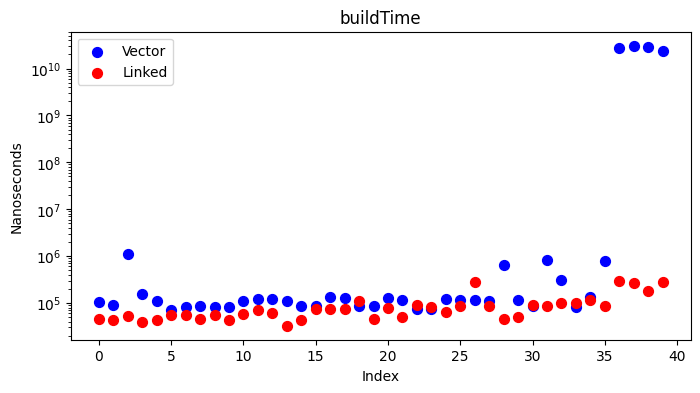

Vector: Mean:   2775333768, 25%:        86700, 50%:       115350, 75%:       142000, 100%:  30614025300
Linked: Mean:        91070, 25%:        48600, 50%:        72500, 75%:        89625, 100%:       290700


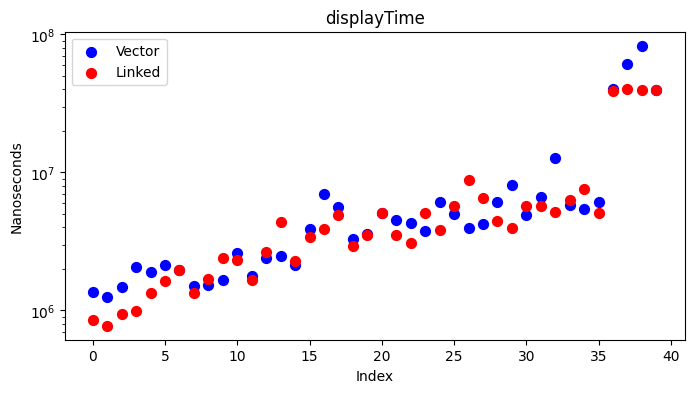

Vector: Mean:      9195492, 25%:      2116350, 50%:      4093400, 75%:      6079925, 100%:     82864100
Linked: Mean:      7231905, 25%:      2212200, 50%:      3847600, 75%:      5701400, 100%:     40012700


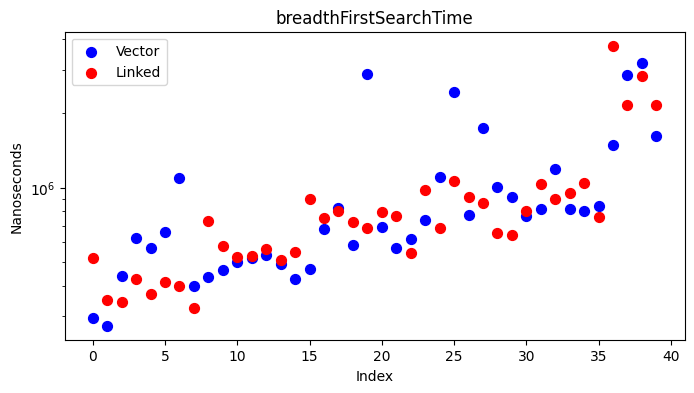

Vector: Mean:       953862, 25%:       513225, 50%:       717250, 75%:      1026025, 100%:      3199100
Linked: Mean:       882335, 25%:       526075, 50%:       726450, 75%:       906300, 100%:      3764000


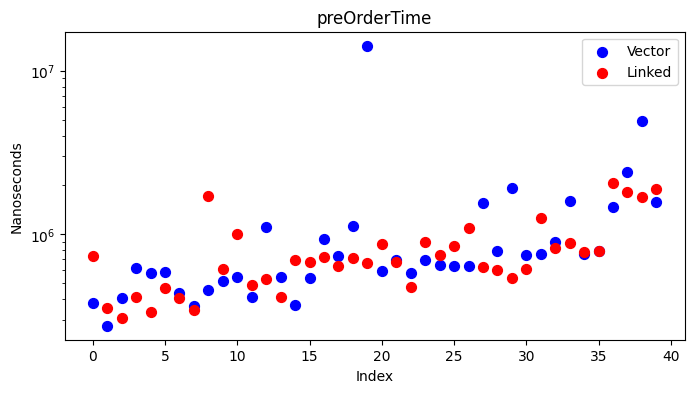

Vector: Mean:      1247060, 25%:       544725, 50%:       670100, 75%:       976675, 100%:     14245500
Linked: Mean:       805050, 25%:       521125, 50%:       687750, 75%:       876250, 100%:      2049400


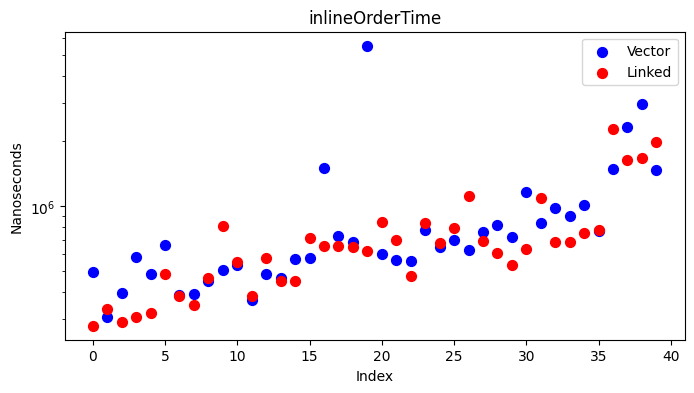

Vector: Mean:       918730, 25%:       502725, 50%:       656200, 75%:       849850, 100%:      5508500
Linked: Mean:       728482, 25%:       463000, 50%:       648850, 75%:       779775, 100%:      2276400


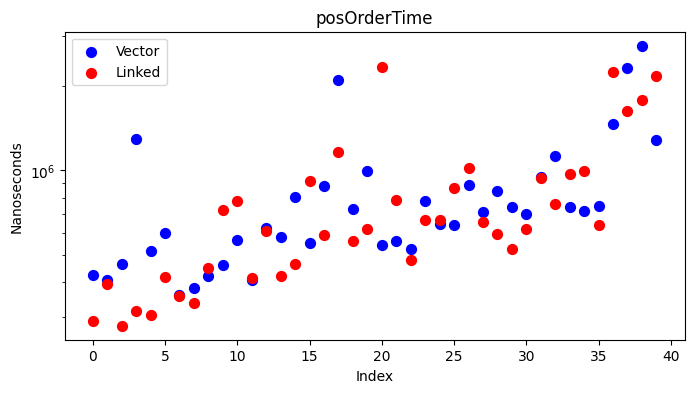

Vector: Mean:       830932, 25%:       537600, 50%:       704950, 75%:       880575, 100%:      2775300
Linked: Mean:       793510, 25%:       441450, 50%:       629500, 75%:       925200, 100%:      2335300


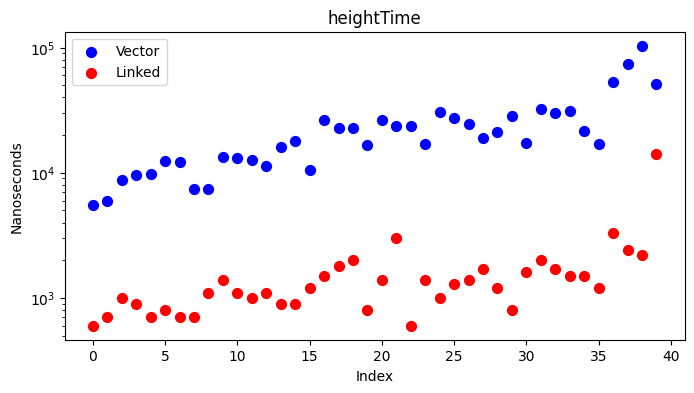

Vector: Mean:        23352, 25%:        12425, 50%:        18500, 75%:        26650, 100%:       103400
Linked: Mean:         1652, 25%:          900, 50%:         1200, 75%:         1625, 100%:        14000


In [21]:
for index, value in enumerate(plot_time_list):
    vector_time = vector[value]
    linked_time = linked[value]

    plt.figure(figsize=(8, 4))
    plt.scatter(np.arange(len(vector_time)), vector_time, label='Vector', color='blue', s=50)
    plt.scatter(np.arange(len(linked_time)), linked_time, label='Linked', color='red', s=50)
    plt.ylabel('Nanoseconds')
    plt.yscale(scale)
    plt.title(value)
    plt.xlabel('Index')
    plt.legend()
    plt.show()
    plt.close()
    print("Vector:", end=" ")
    print_percentiles_and_mean(vector[value])
    print("Linked:", end=" ")
    print_percentiles_and_mean(linked[value])

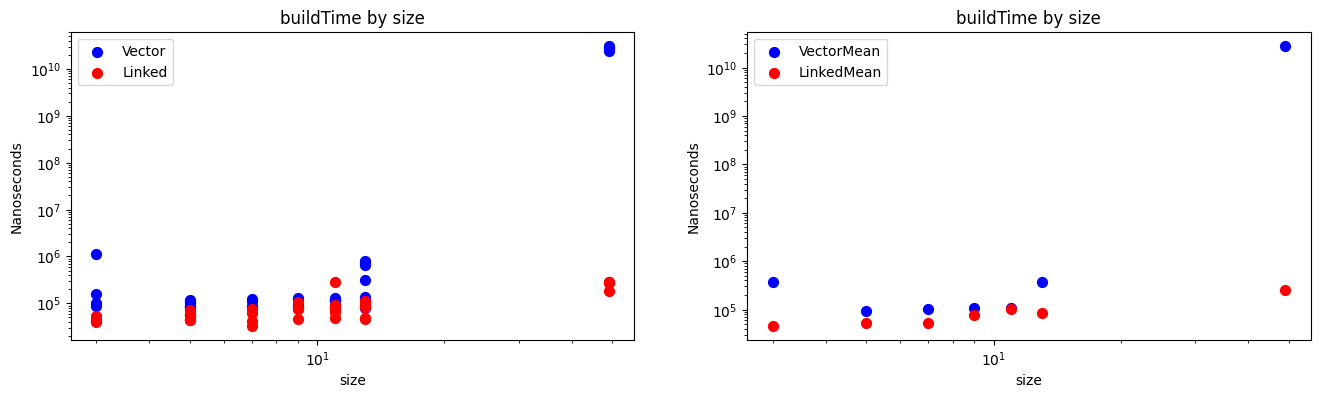

Vector: Mean:   2775333768, 25%:        86700, 50%:       115350, 75%:       142000, 100%:  30614025300
Linked: Mean:        91070, 25%:        48600, 50%:        72500, 75%:        89625, 100%:       290700


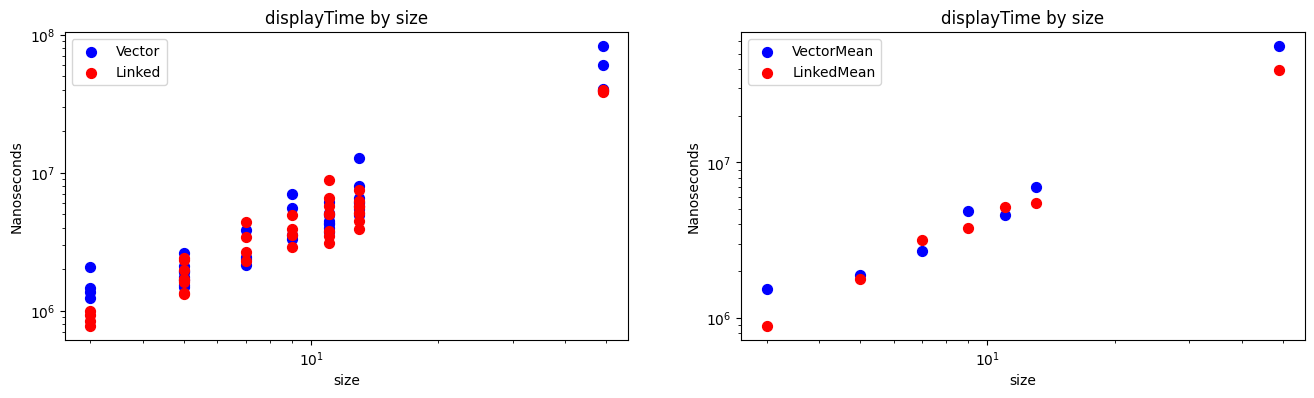

Vector: Mean:      9195492, 25%:      2116350, 50%:      4093400, 75%:      6079925, 100%:     82864100
Linked: Mean:      7231905, 25%:      2212200, 50%:      3847600, 75%:      5701400, 100%:     40012700


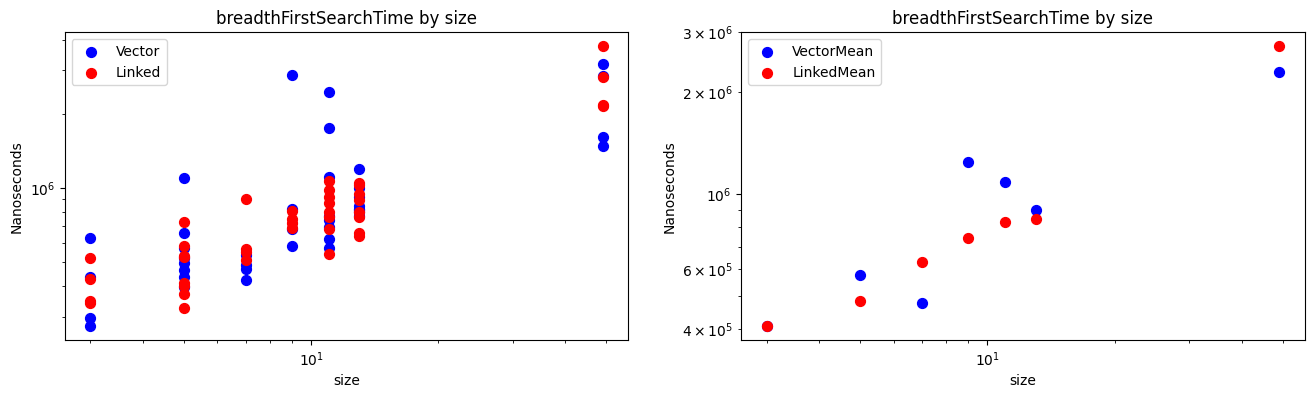

Vector: Mean:       953862, 25%:       513225, 50%:       717250, 75%:      1026025, 100%:      3199100
Linked: Mean:       882335, 25%:       526075, 50%:       726450, 75%:       906300, 100%:      3764000


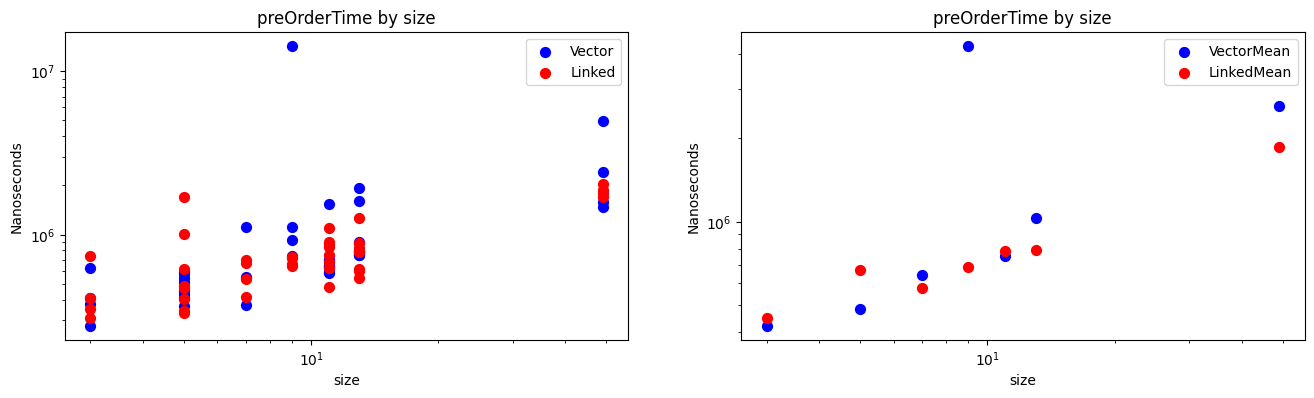

Vector: Mean:      1247060, 25%:       544725, 50%:       670100, 75%:       976675, 100%:     14245500
Linked: Mean:       805050, 25%:       521125, 50%:       687750, 75%:       876250, 100%:      2049400


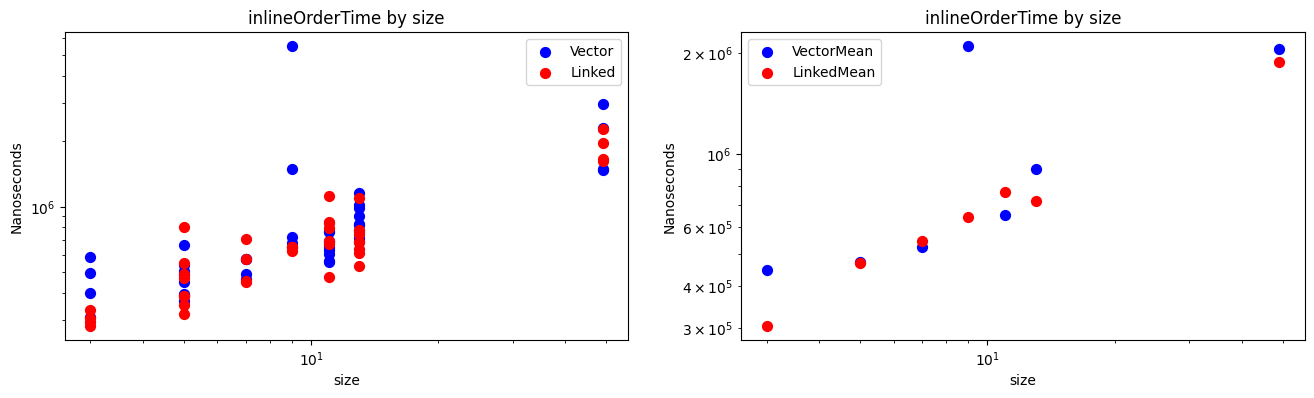

Vector: Mean:       918730, 25%:       502725, 50%:       656200, 75%:       849850, 100%:      5508500
Linked: Mean:       728482, 25%:       463000, 50%:       648850, 75%:       779775, 100%:      2276400


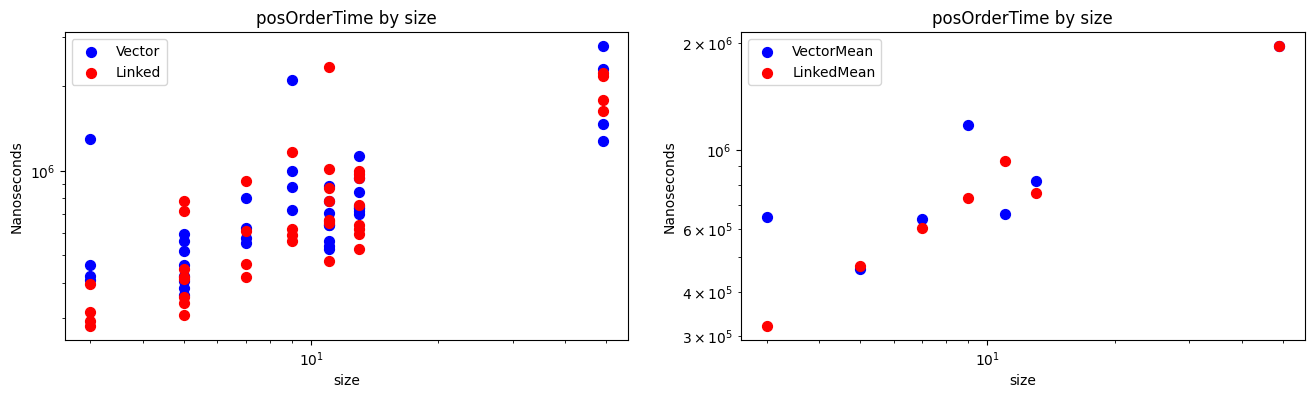

Vector: Mean:       830932, 25%:       537600, 50%:       704950, 75%:       880575, 100%:      2775300
Linked: Mean:       793510, 25%:       441450, 50%:       629500, 75%:       925200, 100%:      2335300


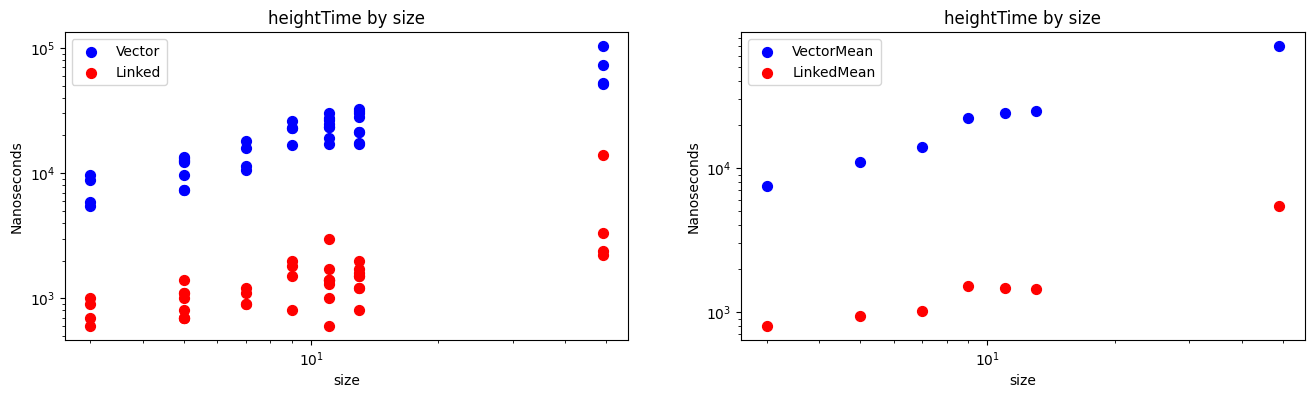

Vector: Mean:        23352, 25%:        12425, 50%:        18500, 75%:        26650, 100%:       103400
Linked: Mean:         1652, 25%:          900, 50%:         1200, 75%:         1625, 100%:        14000


In [22]:
x_variable = "size"
grouped = data.groupby(['type', x_variable]).mean()
grouped = grouped.reset_index()
vector_grouped = grouped[grouped['type'] == 'Vector']
linked_grouped = grouped[grouped['type'] == 'Linked']
for index, value in enumerate(plot_time_list):
    title = value + " by " + x_variable
    vector_time = vector[value]
    linked_time = linked[value]

    vector_time_mean = vector_grouped[value]
    linked_time_mean = linked_grouped[value]
    x_variable_value = vector[x_variable]
    x_variable_mean_value = vector_grouped[x_variable]

    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(x_variable_value, vector_time, label='Vector', color='blue', s=50)
    plt.scatter(x_variable_value, linked_time, label='Linked', color='red', s=50)
    plt.ylabel('Nanoseconds')
    plt.xscale(scale)
    plt.yscale(scale)
    plt.title(title)
    plt.xlabel(x_variable)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(x_variable_mean_value, vector_time_mean, label='VectorMean', color='blue', s=50)
    plt.scatter(x_variable_mean_value, linked_time_mean, label='LinkedMean', color='red', s=50)

    plt.ylabel('Nanoseconds')
    plt.xscale(scale)
    plt.yscale(scale)
    plt.title(title)
    plt.xlabel(x_variable)
    plt.legend()
    plt.show()
    plt.close()

    print("Vector:", end=" ")
    print_percentiles_and_mean(vector[value])
    print("Linked:", end=" ")
    print_percentiles_and_mean(linked[value])

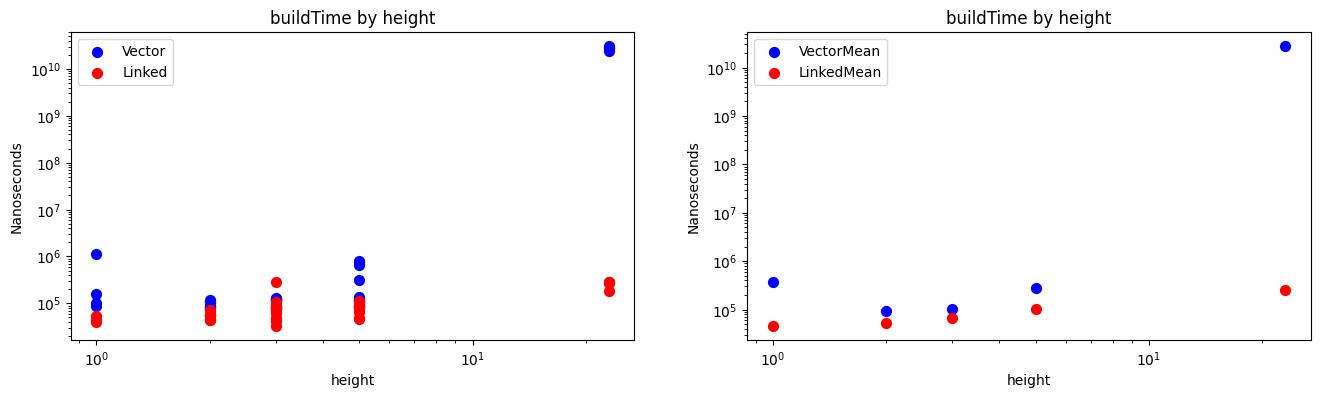

Vector: Mean:   2775333768, 25%:        86700, 50%:       115350, 75%:       142000, 100%:  30614025300
Linked: Mean:        91070, 25%:        48600, 50%:        72500, 75%:        89625, 100%:       290700


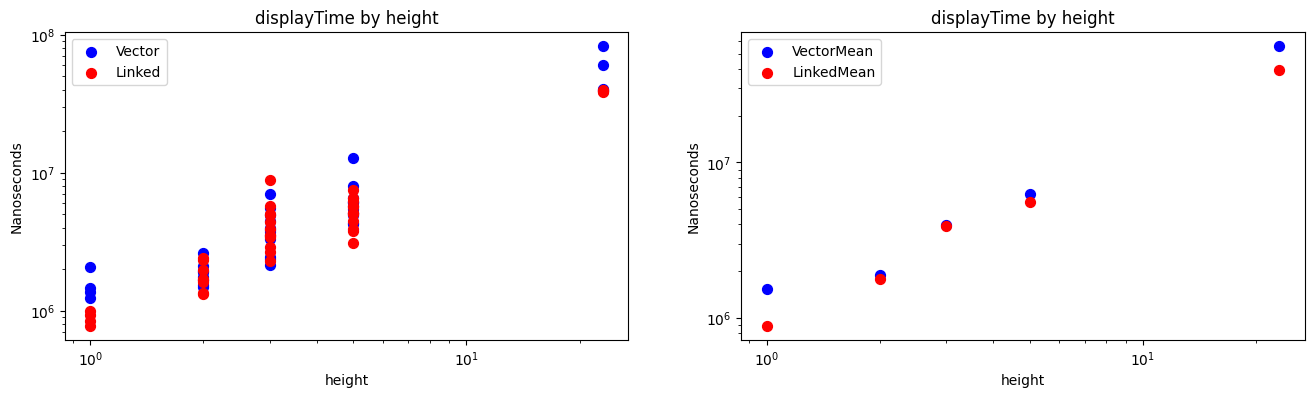

Vector: Mean:      9195492, 25%:      2116350, 50%:      4093400, 75%:      6079925, 100%:     82864100
Linked: Mean:      7231905, 25%:      2212200, 50%:      3847600, 75%:      5701400, 100%:     40012700


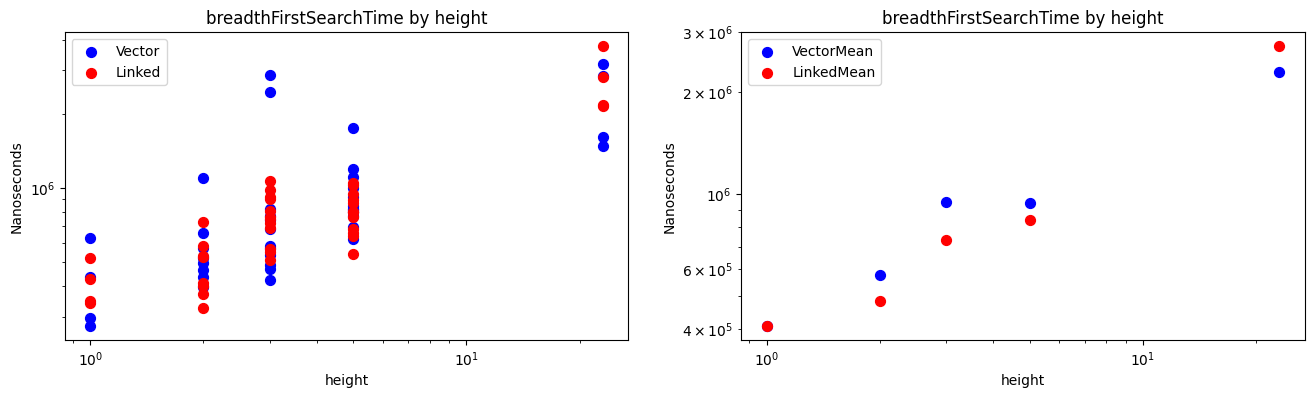

Vector: Mean:       953862, 25%:       513225, 50%:       717250, 75%:      1026025, 100%:      3199100
Linked: Mean:       882335, 25%:       526075, 50%:       726450, 75%:       906300, 100%:      3764000


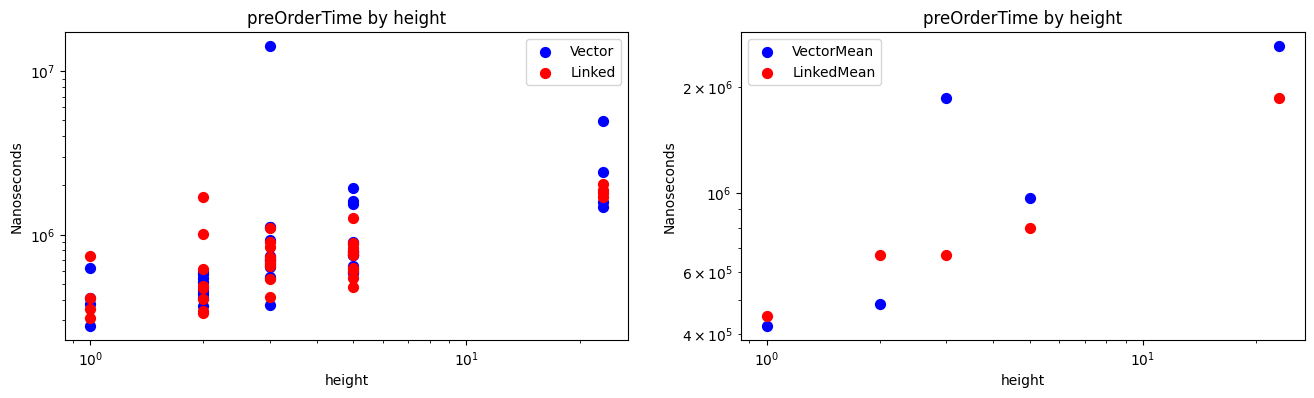

Vector: Mean:      1247060, 25%:       544725, 50%:       670100, 75%:       976675, 100%:     14245500
Linked: Mean:       805050, 25%:       521125, 50%:       687750, 75%:       876250, 100%:      2049400


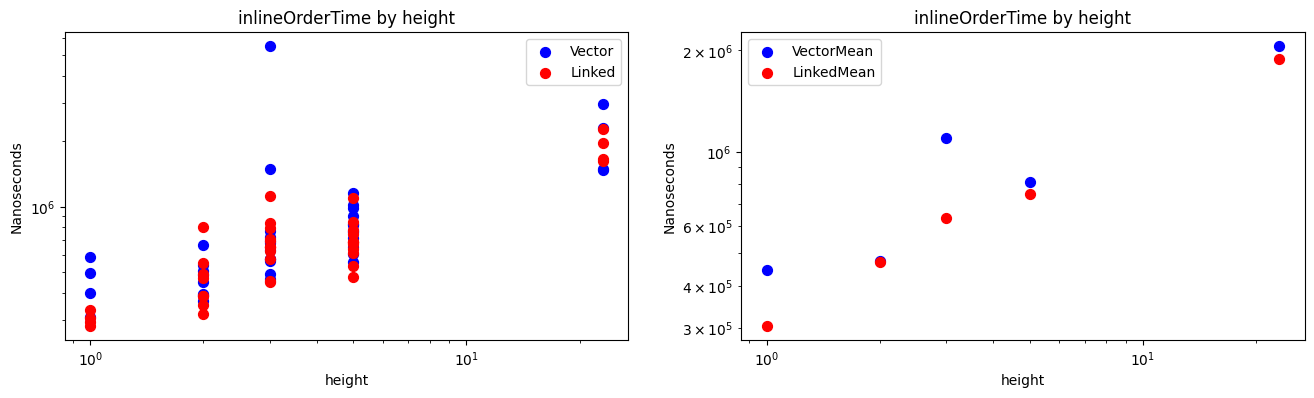

Vector: Mean:       918730, 25%:       502725, 50%:       656200, 75%:       849850, 100%:      5508500
Linked: Mean:       728482, 25%:       463000, 50%:       648850, 75%:       779775, 100%:      2276400


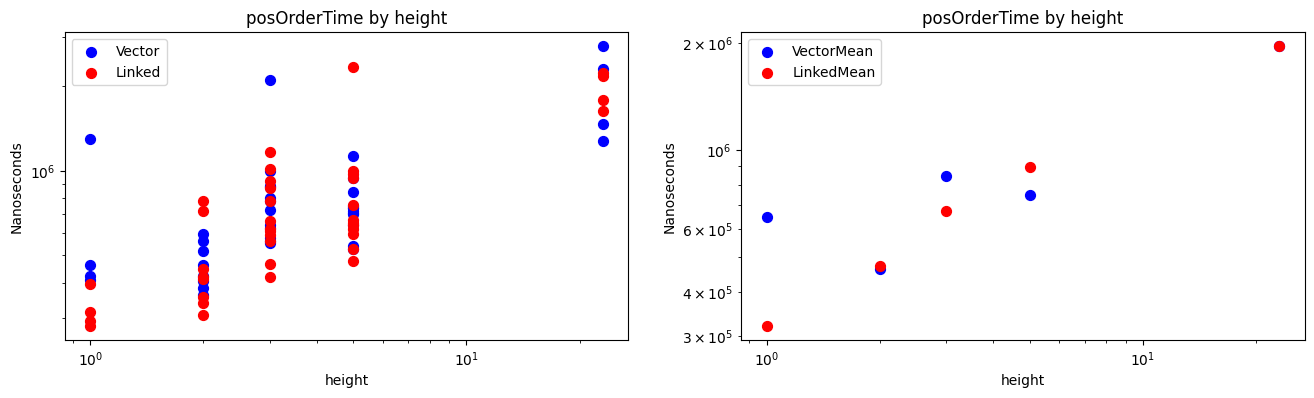

Vector: Mean:       830932, 25%:       537600, 50%:       704950, 75%:       880575, 100%:      2775300
Linked: Mean:       793510, 25%:       441450, 50%:       629500, 75%:       925200, 100%:      2335300


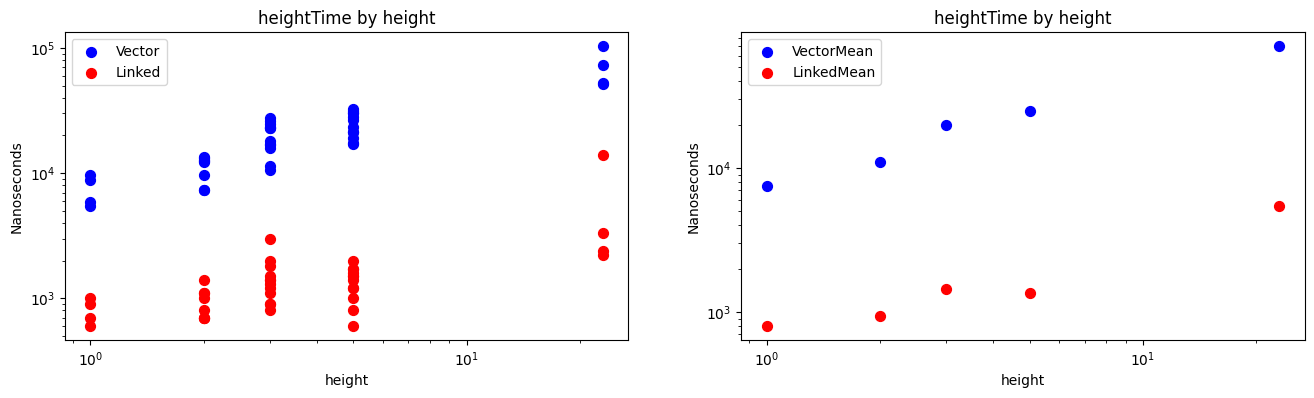

Vector: Mean:        23352, 25%:        12425, 50%:        18500, 75%:        26650, 100%:       103400
Linked: Mean:         1652, 25%:          900, 50%:         1200, 75%:         1625, 100%:        14000


In [23]:
x_variable = "height"
grouped = data.groupby(['type', x_variable]).mean()
grouped = grouped.reset_index()
vector_grouped = grouped[grouped['type'] == 'Vector']
linked_grouped = grouped[grouped['type'] == 'Linked']
for index, value in enumerate(plot_time_list):
    title = value + " by " + x_variable
    vector_time = vector[value]
    linked_time = linked[value]

    vector_time_mean = vector_grouped[value]
    linked_time_mean = linked_grouped[value]
    x_variable_value = vector[x_variable]
    x_variable_mean_value = vector_grouped[x_variable]

    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(x_variable_value, vector_time, label='Vector', color='blue', s=50)
    plt.scatter(x_variable_value, linked_time, label='Linked', color='red', s=50)
    plt.ylabel('Nanoseconds')
    plt.xscale(scale)
    plt.yscale(scale)
    plt.title(title)
    plt.xlabel(x_variable)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(x_variable_mean_value, vector_time_mean, label='VectorMean', color='blue', s=50)
    plt.scatter(x_variable_mean_value, linked_time_mean, label='LinkedMean', color='red', s=50)

    plt.ylabel('Nanoseconds')
    plt.xscale(scale)
    plt.yscale(scale)
    plt.title(title)
    plt.xlabel(x_variable)
    plt.legend()
    plt.show()
    plt.close()

    print("Vector:", end=" ")
    print_percentiles_and_mean(vector[value])
    print("Linked:", end=" ")
    print_percentiles_and_mean(linked[value])